In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('table-1.csv')

# Display basic information
print(df.head())
print(df.info())

                         Common name                          Binomial name  \
0                Broad-faced potoroo          Potorous platyops Gould, 1844   
1               Eastern hare wallaby     Lagorchestes leporides Gould, 1841   
2           Lake Mackay hare-wallaby  Lagorchestes asomatus Finlayson, 1943   
3                Desert rat-kangaroo     Caloprymnus campestris Gould, 1843   
4  Thylacine,or Tasmanian wolf/tiger   Thylacinus cynocephalus Harris, 1808   

            Order Date of extinction         Former range  Picture  
0   Diprotodontia             1875 1            Australia      NaN  
1   Diprotodontia             1889 1            Australia      NaN  
2   Diprotodontia             1932 1            Australia      NaN  
3   Diprotodontia             1935 1            Australia      NaN  
4  Dasyuromorphia             1936 1  Australia, Tasmania      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Colu

In [2]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df = df.fillna('Unknown')  # Example of filling missing values


Common name            0
Binomial name          0
Order                  0
Date of extinction     0
Former range           4
Picture               85
dtype: int64


In [4]:
# Convert 'Date of extinction' to datetime format
df['Date of extinction'] = pd.to_datetime(df['Date of extinction'], errors='coerce')


In [5]:
# Summary statistics
print(df.describe())


                Common name                  Binomial name     Order  \
count                    85                             85        85   
unique                   85                             85        13   
top     Broad-faced potoroo  Potorous platyops Gould, 1844  Rodentia   
freq                      1                              1        40   
first                   NaN                            NaN       NaN   
last                    NaN                            NaN       NaN   

         Date of extinction Former range  Picture  
count                    44           85       85  
unique                   39           60        1  
top     1931-01-01 00:00:00    Australia  Unknown  
freq                      2           13       85  
first   1768-01-01 00:00:00          NaN      NaN  
last    2016-01-01 00:00:00          NaN      NaN  


C:\Users\91962\AppData\Local\Temp\ipykernel_13664\3226935340.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe())


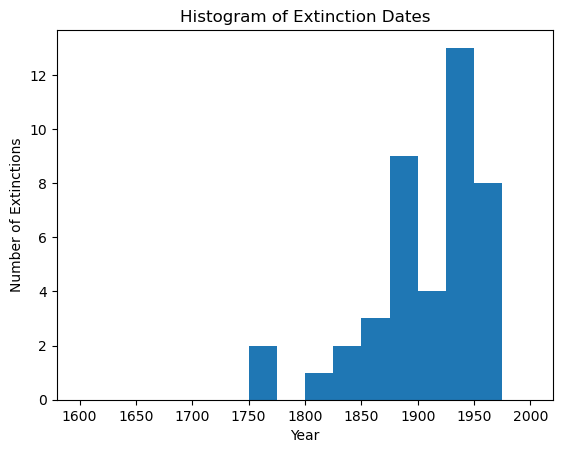

In [6]:
import matplotlib.pyplot as plt

# Histogram of extinction dates
plt.hist(df['Date of extinction'].dropna().dt.year, bins=range(1600, 2025, 25))
plt.xlabel('Year')
plt.ylabel('Number of Extinctions')
plt.title('Histogram of Extinction Dates')
plt.show()


In [1]:
import seaborn as sns

# Count of extinct species by order
order_counts = df['Order'].value_counts()
sns.barplot(x=order_counts.index, y=order_counts.values)
plt.xlabel('Order')
plt.ylabel('Number of Extinct Species')
plt.title('Extinct Species by Order')
plt.xticks(rotation=90)
plt.show()


NameError: name 'df' is not defined

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode categorical data and handle missing values
df_encoded = pd.get_dummies(df[['Order', 'Former range']], drop_first=True)
df_encoded['Date of extinction'] = df['Date of extinction'].dt.year

# Define features and target
X = df_encoded.fillna(0)
y = df['Date of extinction'].notnull().astype(int)  # Binary target: 1 if extinct, 0 if not

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[13  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



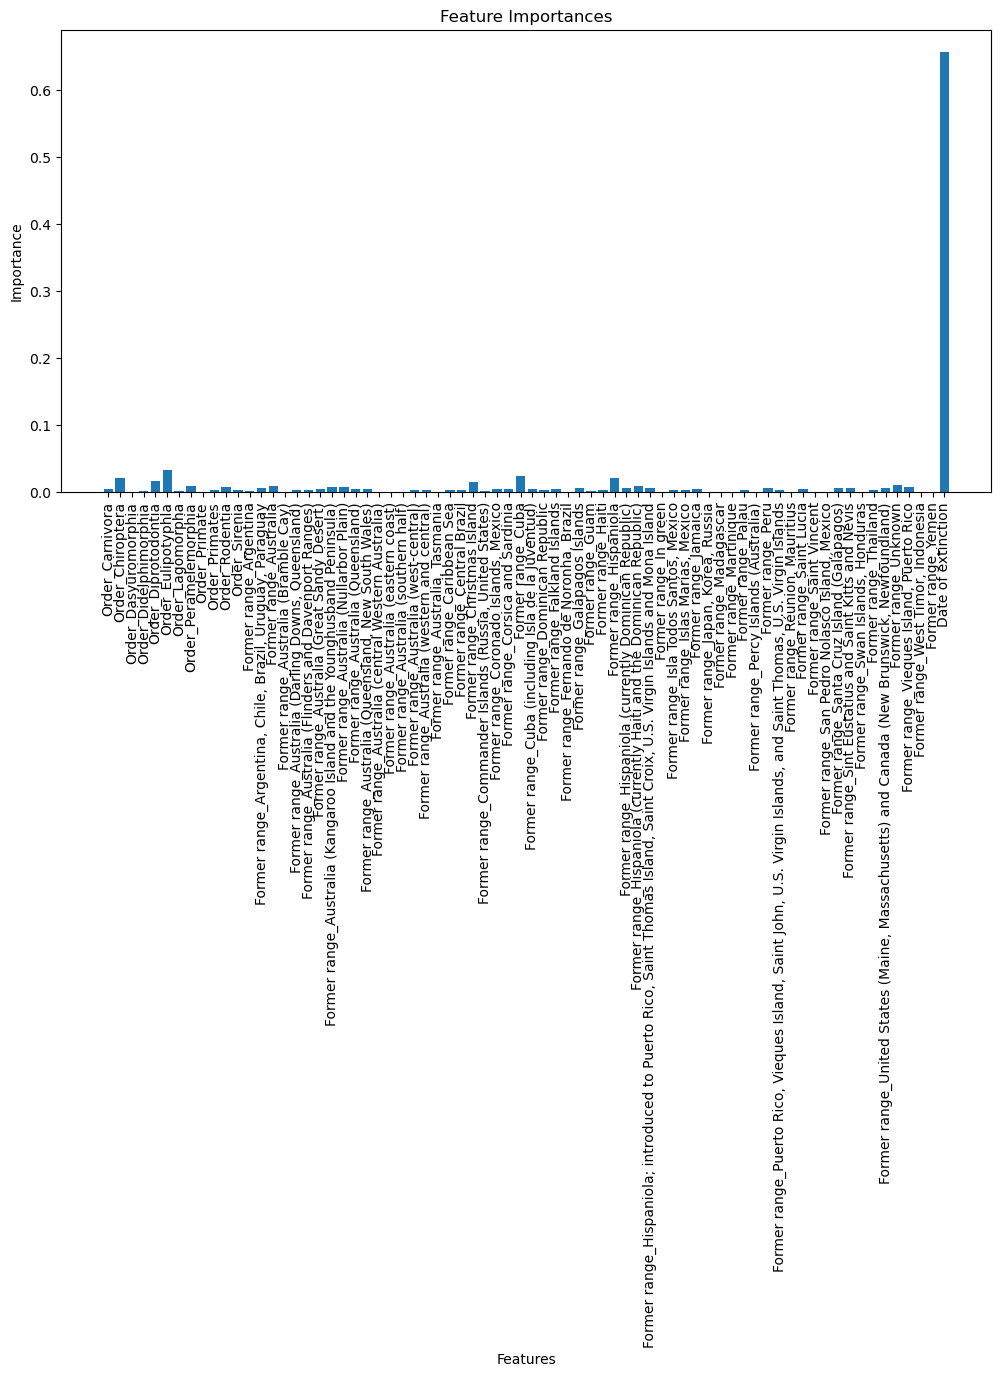

In [11]:
importances = model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


In [9]:
import matplotlib.pyplot as plt

# Create a 'Year' column from 'Date of extinction'
df['Year'] = df['Date of extinction'].dt.year

# Drop rows with missing 'Year'
df = df.dropna(subset=['Year'])

# Group by 'Year' and 'Order', and count the number of extinctions
extinction_counts = df.groupby(['Year', 'Order']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(12, 6))
for order in extinction_counts['Order'].unique():
    subset = extinction_counts[extinction_counts['Order'] == order]
    plt.plot(subset['Year'], subset['Count'], label=order)

plt.xlabel('Year')
plt.ylabel('Number of Extinctions')
plt.title('Extinction Trends by Order')
plt.legend()
plt.show()


C:\Users\91962\AppData\Local\Temp\ipykernel_6328\3051205352.py:22: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



In [6]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('table-1.csv')

# Display basic information
print(df.head())
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values
df = df.fillna('Unknown')  # Example of filling missing values

# Convert 'Date of extinction' to datetime format
df['Date of extinction'] = pd.to_datetime(df['Date of extinction'], errors='coerce')

# Create 'Year' column from 'Date of extinction'
df['Year'] = df['Date of extinction'].dt.year

# Drop rows with missing 'Year'
df = df.dropna(subset=['Year'])

# Summary statistics
print(df.describe())


                         Common name                          Binomial name  \
0                Broad-faced potoroo          Potorous platyops Gould, 1844   
1               Eastern hare wallaby     Lagorchestes leporides Gould, 1841   
2           Lake Mackay hare-wallaby  Lagorchestes asomatus Finlayson, 1943   
3                Desert rat-kangaroo     Caloprymnus campestris Gould, 1843   
4  Thylacine,or Tasmanian wolf/tiger   Thylacinus cynocephalus Harris, 1808   

            Order Date of extinction         Former range  Picture  
0   Diprotodontia             1875 1            Australia      NaN  
1   Diprotodontia             1889 1            Australia      NaN  
2   Diprotodontia             1932 1            Australia      NaN  
3   Diprotodontia             1935 1            Australia      NaN  
4  Dasyuromorphia             1936 1  Australia, Tasmania      NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Colu

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Histogram of extinction dates
plt.hist(df['Year'].dropna(), bins=range(1600, 2025, 25))
plt.xlabel('Year')
plt.ylabel('Number of Extinctions')
plt.title('Histogram of Extinction Dates')
plt.show()

# Count of extinct species by order
order_counts = df['Order'].value_counts()
sns.barplot(x=order_counts.index, y=order_counts.values)
plt.xlabel('Order')
plt.ylabel('Number of Extinct Species')
plt.title('Extinct Species by Order')
plt.xticks(rotation=90)
plt.show()

# Interactive plot of extinction by year
fig = px.histogram(df, x='Year', title='Extinctions Over Time')
fig.show()

# Interactive plot of extinct species by order
fig = px.bar(df, x='Order', title='Extinct Species by Order')
fig.show()


C:\Users\91962\AppData\Local\Temp\ipykernel_6328\517717020.py:10: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.

C:\Users\91962\AppData\Local\Temp\ipykernel_6328\517717020.py:19: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



In [9]:
################################################################################################################################